In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('weather_start.csv')
print(df.shape)
df.head()

(366, 23)


,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,'6','Rain','46','29','74','30.45','64','10','22','63',...,'13','40','26','52','30.01','39','10','0.01','268',Year: 2014 Month: 12 Day: 1
1,'7','Rain-Snow','40','29','92','30.71','42','10','24','72',...,'15','27','17','51','30.4','33','2','0.10','62',Year: 2014 Month: 12 Day: 2
2,'8','Rain','49','38','100','30.4','51','10','29','79',...,'12','42','24','57','29.87','37','1','0.44','254',Year: 2014 Month: 12 Day: 3
3,'3',NaN,'24','33','69','30.56','43','10','25','54',...,'12','21','13','39','30.09','30','10','0.00','292',Year: 2014 Month: 12 Day: 4
4,'5','Rain','37','26','85','30.68','42','10','22','66',...,'10','25','12','47','30.45','26','5','0.11','61',Year: 2014 Month: 12 Day: 5


<div style="color: pink; 
            background-color: #b73239;
            border-radius: 5px;
            padding: 5px 5px 5px 5px;
            display: inline-block">
    If you get a `SettingWithCopyWarning:` when using pandas, you can almost always ignore it. 
</div>

This dataframe has a lot of problems regarding the quality of the data. As the name suggests the dataset describes various weather related measurements taken over a period of time. We can see the `Date` column has this information in a weird text-based style. Then you have individual weather related measurements (`Max.TemperatureF`, `Max.Dew.PointF` etc) but the values of these columns have quotes around them ('') so these need to be cleaned and converted to the correct type. 

So the first order of business is to parse the `Date` column and obtain separate year, month and day columns as integer values. You will use regex for this, the regex extract function is available in the `.str` accessor. Then you will combine these three columns using `pd.to_datetime` to create a datetime column which is a special type in pandas. It gives you some amazing funcitonality which is available through the `.dt` accessor (on a pandas series of the correct type only). 

For the weather related columns you need to fix the types (converting them all to float is very easy even though some of them should technically be ints). The simple pandas way of converting column types using `.astype` will not work because of the quotes. So you will need to remove them first using the `.str` accessor on all the columns and then use `.astype` (for-loops are your friends).

Then, you can start the process of data cleaning and exploration as these two things go hand-in-hand. Look for missing values and outliers. You can use different methods to find these problem points, visual methods like plots or analytical methods like summary statistics. You should also keep an eye out for inconsistent encodings. These are more common in categorical variables like a column describing gender has both full words (female, male) and letters (f, m). You will need to properly standardise this issue. Another source of these inconsistencies is when recording a numeric variable like age the person might enter a question mark (?) or the letter (x) to mark the value as missing. Pandas might not detect this as a missing value and simply running `df.isna().sum()` will give you a false image of the data's quality. For this case you will have to manually replace these rogue characters with `np.NaN` and then use your preferred method of imputation.

In [3]:
df.dtypes

CloudCover                   object
Events                       object
Max.Dew.PointF               object
Max.Gust.SpeedMPH            object
Max.Humidity                 object
Max.Sea.Level.PressureIn     object
Max.TemperatureF             object
Max.VisibilityMiles          object
Max.Wind.SpeedMPH            object
Mean.Humidity                object
Mean.Sea.Level.PressureIn    object
Mean.TemperatureF            object
Mean.VisibilityMiles         object
Mean.Wind.SpeedMPH           object
MeanDew.PointF               object
Min.DewpointF                object
Min.Humidity                 object
Min.Sea.Level.PressureIn     object
Min.TemperatureF             object
Min.VisibilityMiles          object
PrecipitationIn              object
WindDirDegrees               object
Date                         object
dtype: object

Everything is a string. This is a sign of a long day of data cleaning ahead. Good Luck!

In [4]:
df['Year'] = df['Date'].str.extract(r'Year: (\d+).*')
df['Month'] = df['Date'].str.extract(r'.*Month: (\d+).*')
df['Day'] = df['Date'].str.extract(r'.*Day: (\d+).*')
df.drop('Date', axis=1, inplace=True)
df.head()

,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Year,Month,Day
0,'6','Rain','46','29','74','30.45','64','10','22','63',...,'26','52','30.01','39','10','0.01','268',2014,12,1
1,'7','Rain-Snow','40','29','92','30.71','42','10','24','72',...,'17','51','30.4','33','2','0.10','62',2014,12,2
2,'8','Rain','49','38','100','30.4','51','10','29','79',...,'24','57','29.87','37','1','0.44','254',2014,12,3
3,'3',NaN,'24','33','69','30.56','43','10','25','54',...,'13','39','30.09','30','10','0.00','292',2014,12,4
4,'5','Rain','37','26','85','30.68','42','10','22','66',...,'12','47','30.45','26','5','0.11','61',2014,12,5


In [5]:
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df.drop(['Year','Month','Day'], axis=1, inplace=True)

# Reorder columns to bring date to left-most position
# cols = df.columns.tolist()
# df = df[[cols[-1]] + cols[:-1]]

# df.head()

Everything is a string, that means encoding issues can be present. A simple way to detect these is to try to convert string columns to numbers and if there is an entry like a rogue question mark or an 'x', python will raise an exception. Don't forget about dealing with the quotes around the values. 

`Events` has missing values and we can deal with them later so we will postpone changing the type from string to categorical for now. (Imputing values in a category-types column is a little awkward syntactically)
The rest of the columns can be represented as floats. The for-loop will fail with an exception when it encounters a problematic column. 

Apparently the `PrecipitationIn` column contains a string "'T'". This represents a trace amount of rain so we can replace this with a 0 without any problems. Fixing this results makes  the for-loop finish without any problems.  

In [6]:
# df['Events'] = df['Events'].astype('category')
df['PrecipitationIn'][df['PrecipitationIn'] == "'T'"] = 0

#converting data types of numeric columns. Excluding the quotes and then converting types.
for c in df.columns:
    if c in ['Date','Events']:
        continue
    df[c] = df[c].str[1:-1].astype('float')

C:\Users\tooba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
df.dtypes

CloudCover                          float64
Events                               object
Max.Dew.PointF                      float64
Max.Gust.SpeedMPH                   float64
Max.Humidity                        float64
Max.Sea.Level.PressureIn            float64
Max.TemperatureF                    float64
Max.VisibilityMiles                 float64
Max.Wind.SpeedMPH                   float64
Mean.Humidity                       float64
Mean.Sea.Level.PressureIn           float64
Mean.TemperatureF                   float64
Mean.VisibilityMiles                float64
Mean.Wind.SpeedMPH                  float64
MeanDew.PointF                      float64
Min.DewpointF                       float64
Min.Humidity                        float64
Min.Sea.Level.PressureIn            float64
Min.TemperatureF                    float64
Min.VisibilityMiles                 float64
PrecipitationIn                     float64
WindDirDegrees                      float64
Date                         dat

In [8]:
df.isna().sum()

CloudCover                     0
Events                       201
Max.Dew.PointF                 0
Max.Gust.SpeedMPH              6
Max.Humidity                   0
Max.Sea.Level.PressureIn       0
Max.TemperatureF               0
Max.VisibilityMiles            0
Max.Wind.SpeedMPH              0
Mean.Humidity                  0
Mean.Sea.Level.PressureIn      0
Mean.TemperatureF              0
Mean.VisibilityMiles           0
Mean.Wind.SpeedMPH             0
MeanDew.PointF                 0
Min.DewpointF                  0
Min.Humidity                   0
Min.Sea.Level.PressureIn       0
Min.TemperatureF               0
Min.VisibilityMiles            0
PrecipitationIn               49
WindDirDegrees                 0
Date                           0
dtype: int64

Let's look at the values of the numeric columns to identify some obvious problems. 

In [9]:
#exclude date and events column
plot_data = df.loc[:, ~df.columns.isin(['Date', 'Events'])]

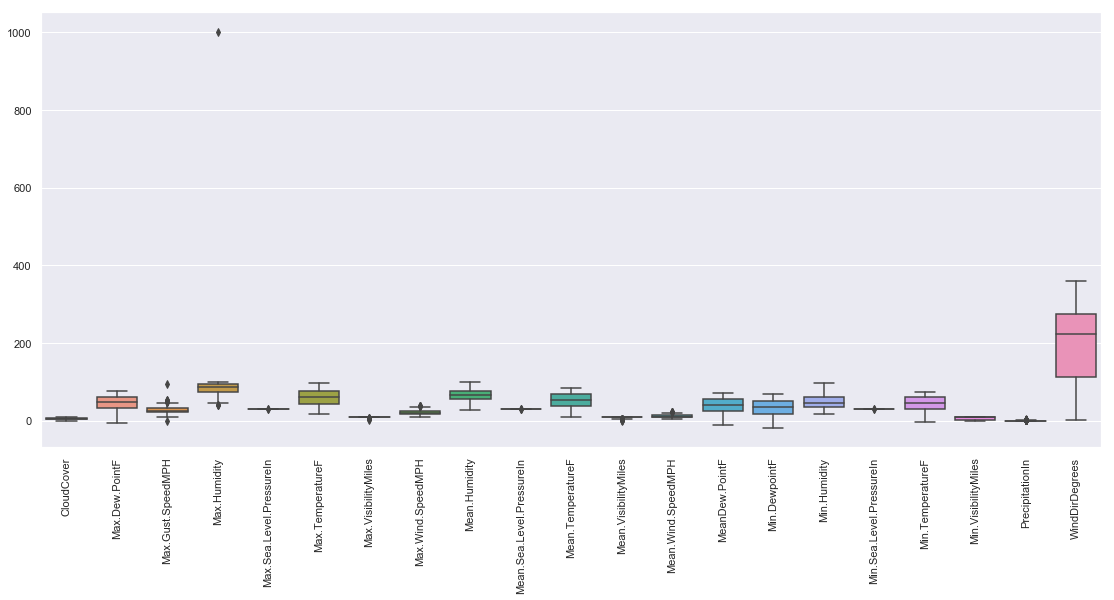

In [10]:
fig, ax = plt.subplots(figsize=(19, 8))
sns.boxplot(data = plot_data, ax=ax) 
plt.xticks(rotation=90);

Clearly there is a mistake with that single datapoint in `Max.Humidity`. It was probably supposed to be a 100 instead of a 1000. Let's fix that and redraw the plot. Also let's exclude the `WindDirDegrees` column since it appears to be correct (all values 0-360 represented). 

In [11]:
df['Max.Humidity'][df['Max.Humidity'].idxmax()] = 100

C:\Users\tooba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
#exclude date,events and WindDirDegrees
plot_data = df.loc[:, ~df.columns.isin(['Date', 'Events', 'WindDirDegrees'])]

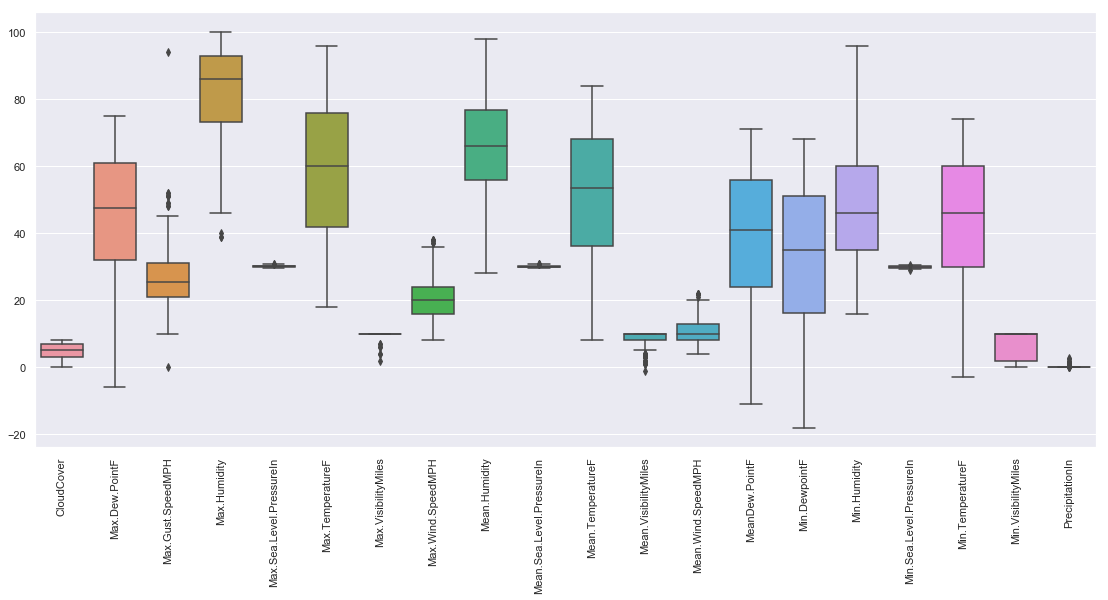

In [13]:
fig, ax = plt.subplots(figsize=(19, 8))
sns.boxplot(data = plot_data, ax=ax) 
plt.xticks(rotation=90);

We can see that `Max.Gust.SpeedMPH` is right skewed so using the median to impute the missing values is the best option here. 

In [14]:
med = df['Max.Gust.SpeedMPH'].median()
df['Max.Gust.SpeedMPH'].fillna(med, inplace=True)

`PrecipitationIn` has missing values and due to the scale we can't see its distribution. Let's make a separate plot. 

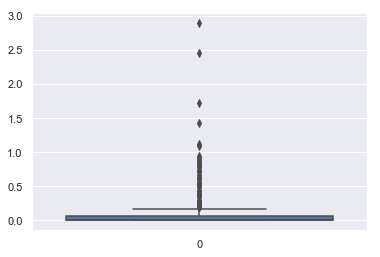

In [15]:
sns.boxplot(data = df['PrecipitationIn']) 

Clearly we need to use median to inpute here too.

In [16]:
med = df['PrecipitationIn'].median()
df['PrecipitationIn'].fillna(med, inplace=True)

Also we can see that `Mean.VisibilityMiles` and `PrecipitationIn` maybe have some points below 0 (hard to see for sure because of the scale of the plot). And we know that these two quantities should always be non-negative.

In [17]:
df[['Min.VisibilityMiles','Mean.VisibilityMiles','Max.VisibilityMiles']][df['Mean.VisibilityMiles'] < 0]

,Min.VisibilityMiles,Mean.VisibilityMiles,Max.VisibilityMiles
199,10.0,-1.0,10.0


There is 1 negative value (-1) in the `Mean.VisibilityMiles` column. It's slightly tricky to fix problems like this in a general case but luckily here we have the min and max values of the same variable (visibility) so we can easily figure out a replcament value. 

In [18]:
df['Mean.VisibilityMiles'][df['Mean.VisibilityMiles'] < 0] = 10

C:\Users\tooba\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now let's finally figure out the missing values in `Events`. The absense of an entry in this column can mean that there were no special weather events that day. Now we can also fix the datatype. 

In [19]:
df['Events'].value_counts()

'Rain'                          90
'Snow'                          31
'Rain-Snow'                     10
'Fog-Rain'                       8
'Fog-Snow'                       7
'Fog'                            6
'Fog-Rain-Snow'                  4
'Rain-Thunderstorm'              4
'Fog-Rain-Thunderstorm'          3
'Thunderstorm'                   1
'Fog-Rain-Hail-Thunderstorm'     1
Name: Events, dtype: int64

In [20]:
#removing quotes
df['Events'] = df['Events'].str[1:-1]
# replacing Nan values with 'None'
df['Events'][df['Events'].isna()] = 'None'
#convert to categorical type
df['Events'] = df['Events'].astype('category')

C:\Users\tooba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [21]:
df['Events'].value_counts()

None                          201
Rain                           90
Snow                           31
Rain-Snow                      10
Fog-Rain                        8
Fog-Snow                        7
Fog                             6
Rain-Thunderstorm               4
Fog-Rain-Snow                   4
Fog-Rain-Thunderstorm           3
Thunderstorm                    1
Fog-Rain-Hail-Thunderstorm      1
Name: Events, dtype: int64

In [22]:
df.isna().sum().sum()

0

Let's take a look at our final cleaned dataset before saving it for analysis. We will save it as a 'pickle', a binary file format which will preserve out column types. Text-based file formats like csv and json do not preserve column data types. 

In [23]:
df.head()

,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,6.0,Rain,46.0,29.0,74.0,30.45,64.0,10.0,22.0,63.0,...,13.0,40.0,26.0,52.0,30.01,39.0,10.0,0.01,268.0,2014-12-01
1,7.0,Rain-Snow,40.0,29.0,92.0,30.71,42.0,10.0,24.0,72.0,...,15.0,27.0,17.0,51.0,30.40,33.0,2.0,0.10,62.0,2014-12-02
2,8.0,Rain,49.0,38.0,100.0,30.40,51.0,10.0,29.0,79.0,...,12.0,42.0,24.0,57.0,29.87,37.0,1.0,0.44,254.0,2014-12-03
3,3.0,None,24.0,33.0,69.0,30.56,43.0,10.0,25.0,54.0,...,12.0,21.0,13.0,39.0,30.09,30.0,10.0,0.00,292.0,2014-12-04
4,5.0,Rain,37.0,26.0,85.0,30.68,42.0,10.0,22.0,66.0,...,10.0,25.0,12.0,47.0,30.45,26.0,5.0,0.11,61.0,2014-12-05


In [24]:
df.to_pickle('weather_clean.pkl')